# A more complete demo of Speasy

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import speasy as spz
from speasy.products import SpeasyVariable
from typing import List

#plt.rcParams["figure.figsize"] = (20, 4)

## Few products from CDAWeb

In [2]:
solos_fgm: SpeasyVariable = spz.get_data(
    spz.inventories.tree.cda.Solar_Orbiter.SOLO.MAG.SOLO_L2_MAG_RTN_NORMAL.B_RTN,
    "2022-03-01",
    "2022-03-01T12",
)
plt.figure()
solos_fgm.plot()
plt.tight_layout()
plt.show()


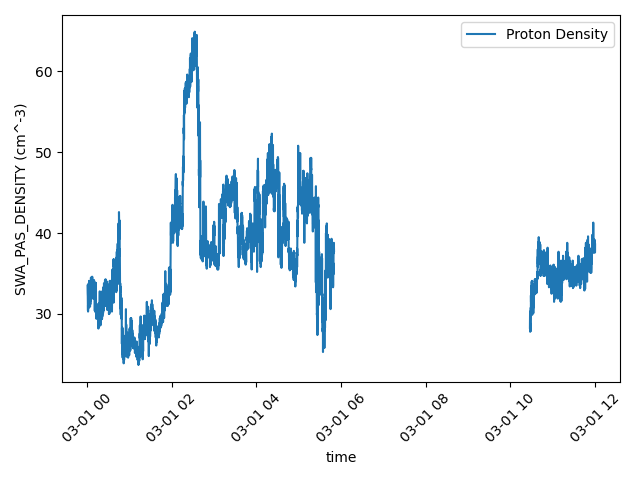

In [3]:
swa_pas_density: SpeasyVariable = spz.get_data(
    spz.inventories.tree.cda.Solar_Orbiter.SOLO.SWA_PAS_MOM.SOLO_LL02_SWA_PAS_MOM.SWA_PAS_DENSITY,
    "2022-03-01",
    "2022-03-01T12",
)
plt.figure()
swa_pas_density.replace_fillval_by_nan().plot()
plt.tight_layout()
plt.show()


In [4]:
mms2_des_energyspectr_omni_fast: SpeasyVariable = spz.get_data(
    spz.inventories.tree.cda.MMS.MMS2.DES.MMS2_FPI_FAST_L2_DES_MOMS.mms2_des_energyspectr_omni_fast,
    "2022-03-02",
    "2022-03-03",
)
plt.figure()
mms2_des_energyspectr_omni_fast.plot(cmap="viridis")
plt.tight_layout()
plt.show()


## Speasy can download several products at once for a given interval

In [6]:
products = [
    spz.inventories.tree.cda.MMS.MMS1.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gse_srvy_l2_clean,
    spz.inventories.tree.cda.MMS.MMS2.FGM.MMS2_FGM_SRVY_L2.mms2_fgm_b_gse_srvy_l2_clean,
    spz.inventories.tree.cda.MMS.MMS3.FGM.MMS3_FGM_SRVY_L2.mms3_fgm_b_gse_srvy_l2_clean,
    spz.inventories.tree.cda.MMS.MMS4.FGM.MMS4_FGM_SRVY_L2.mms4_fgm_b_gse_srvy_l2_clean,
]

#fig = plt.figure(figsize=(20, 8))
fig = plt.figure()
gs = fig.add_gridspec(4, hspace=0)
axes = gs.subplots(sharex=True, sharey=True)
mms_fgm_b_gse_srvy: List[SpeasyVariable] = spz.get_data(
    products, "2019-01-02T14", "2019-01-02T20")
for var, ax in zip(mms_fgm_b_gse_srvy, axes):
    var["Bx GSE", "By GSE", "Bz GSE"].replace_fillval_by_nan().plot(ax=ax)
plt.tight_layout()
plt.show()


## SSCWeb Trajectory example

In [7]:
plt.figure()
spz.get_data(
    spz.inventories.tree.ssc.Trajectories.cluster4, "2010-11-01", "2010-11-30"
).plot()
plt.tight_layout()
plt.show()

## CSA spectrogram example 

In [8]:
plt.figure()
spz.get_data(
    spz.inventories.tree.csa.Cluster.Cluster_1.CIS_HIA1.C1_CP_CIS_HIA_HS_1D_PEF.flux__C1_CP_CIS_HIA_HS_1D_PEF,
    "2006-11-01",
    "2006-11-02",
).plot(cmap="jet")
plt.tight_layout()
plt.show()

## Several product for several dates 

In [13]:
products = [
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_vth,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_pdyn,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_n,
    spz.inventories.tree.cda.Wind.WIND.MFI.WI_H2_MFI.BGSE,
    spz.inventories.tree.ssc.Trajectories.wind,
]

data_several_dates: List[List[SpeasyVariable]] = spz.get_data(
    products,
    spz.inventories.tree.amda.TimeTables.SharedTimeTables.SOLAR_WIND.Magnetic_Clouds
)

for i in range(5):
    #fig = plt.figure(figsize=(20, 6))
    fig = plt.figure()
    gs = fig.add_gridspec(5, hspace=0)
    axes = gs.subplots(sharex=True, sharey=False)
    for j in range(5):
        data_several_dates[j][i].plot(ax=axes[j])
    plt.tight_layout()
plt.show()


/tmp/ipykernel_79848/3139048011.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


## get_data preserves input product list shape 

In [10]:
data_preserve_shape: List[List[List[SpeasyVariable]]] = spz.get_data(
    [
        [
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.Beta,
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.T,
        ],
        [
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.E,
            spz.inventories.tree.cda.OMNI_Combined_1AU_IP_Data__Magnetic_and_Solar_Indices.OMNI_1AU_IP_Data.IMF_and_Plasma_data.OMNI_HRO_1MIN.Pressure,
        ],
    ],
    [["2010-01-02", "2010-01-02T10"], ["2009-08-02", "2009-08-02T10"]]
)
data_preserve_shape


[[[<speasy.products.variable.SpeasyVariable at 0x7f3b2538d7c0>,
 [[<speasy.products.variable.SpeasyVariable at 0x7f3b251c0240>,

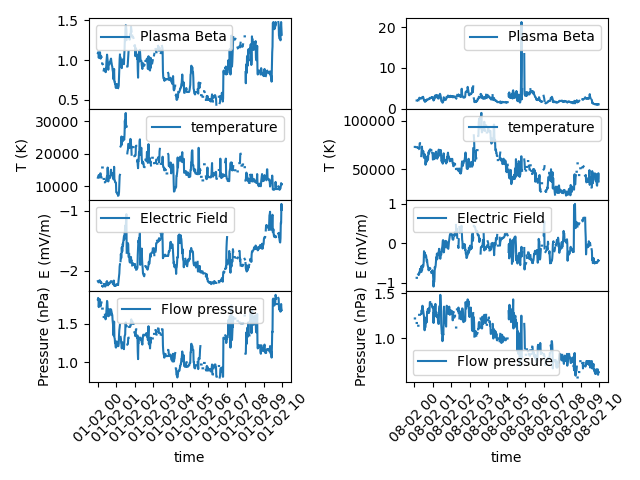

In [12]:
#fig = plt.figure(figsize=(20, 6))
fig = plt.figure()
gs = fig.add_gridspec(1, 2)
left_gs = gs[0, 0].subgridspec(4, 1, hspace=0)
right_gs = gs[0, 1].subgridspec(4, 1, hspace=0)
left_ax = left_gs.subplots(sharex=True, sharey=False)
right_ax = right_gs.subplots(sharex=True, sharey=False)

data_preserve_shape[0][0][0].replace_fillval_by_nan().plot(ax=left_ax[0])
data_preserve_shape[0][1][0].replace_fillval_by_nan().plot(ax=left_ax[1])
data_preserve_shape[1][0][0].replace_fillval_by_nan().plot(ax=left_ax[2])
data_preserve_shape[1][1][0].replace_fillval_by_nan().plot(ax=left_ax[3])

data_preserve_shape[0][0][1].replace_fillval_by_nan().plot(ax=right_ax[0])
data_preserve_shape[0][1][1].replace_fillval_by_nan().plot(ax=right_ax[1])
data_preserve_shape[1][0][1].replace_fillval_by_nan().plot(ax=right_ax[2])
data_preserve_shape[1][1][1].replace_fillval_by_nan().plot(ax=right_ax[3])
plt.tight_layout()
plt.show()